In [34]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
df_Tata = pd.read_csv("Data/TATAMOTORS_with_indicators_.csv")

In [3]:
df_Tata

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-02-02 14:30:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,...,18.518076,0.000000,7.618849,43.940031,-51.141553,1.962061,1.80,590.650000,33.740113,1.177608
1,2015-02-02 14:35:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,...,16.204258,12.051888,4.017296,48.694251,-57.541899,1.957628,1.90,589.866667,32.404181,1.028755
2,2015-02-02 14:40:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,...,18.151815,0.000000,4.017296,46.708143,-75.151515,1.967798,2.10,590.150000,31.377250,0.924290
3,2015-02-02 14:45:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,...,21.485149,0.000000,4.017296,42.824629,-92.465753,1.937955,1.55,589.083333,30.566204,0.803627
4,2015-02-02 14:50:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,...,34.064667,100.000000,33.333333,49.822307,-64.137931,2.035244,3.30,590.366667,29.669480,0.529479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130342,2022-02-18 15:05:00+05:30,493.15,493.40,492.80,493.00,221628,493.18,493.915,495.140000,496.0050,...,45.745614,57.126719,72.499418,41.729108,-79.729730,1.209109,0.60,493.066667,35.438324,0.533217
130343,2022-02-18 15:10:00+05:30,493.00,493.35,492.50,493.15,292571,493.11,493.735,494.770000,495.7150,...,42.412281,100.000000,85.708906,43.464499,-77.551020,1.183458,0.85,493.000000,34.058754,0.134967
130344,2022-02-18 15:15:00+05:30,493.20,493.75,493.00,493.15,377970,493.14,493.550,494.436667,495.4725,...,38.333333,100.000000,85.708906,47.389327,-76.760563,1.152497,0.75,493.300000,32.785115,0.248388
130345,2022-02-18 15:20:00+05:30,493.25,493.30,492.35,492.90,532972,493.08,493.335,494.056667,495.1825,...,30.193798,26.453889,75.484630,41.272606,-76.666667,1.138033,0.95,492.850000,31.761366,0.332462


In [6]:
df_Tata.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'sma5', 'sma10',
       'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'upperband',
       'middleband', 'lowerband', 'HT_TRENDLINE', 'KAMA10', 'KAMA20', 'KAMA30',
       'SAR', 'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5', 'ADX10', 'ADX20', 'APO',
       'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520',
       'macd1226', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'PPO',
       'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk', 'fastd', 'fastksr',
       'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange', 'TYPPRICE',
       'HT_DCPERIOD', 'BETA'],
      dtype='object')

In [7]:
df_Tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130347 entries, 0 to 130346
Data columns (total 59 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          130347 non-null  object 
 1   open          130347 non-null  float64
 2   high          130347 non-null  float64
 3   low           130347 non-null  float64
 4   close         130347 non-null  float64
 5   volume        130347 non-null  int64  
 6   sma5          130347 non-null  float64
 7   sma10         130347 non-null  float64
 8   sma15         130347 non-null  float64
 9   sma20         130347 non-null  float64
 10  ema5          130347 non-null  float64
 11  ema10         130347 non-null  float64
 12  ema15         130347 non-null  float64
 13  ema20         130347 non-null  float64
 14  upperband     130347 non-null  float64
 15  middleband    130347 non-null  float64
 16  lowerband     130347 non-null  float64
 17  HT_TRENDLINE  130347 non-null  float64
 18  KAMA

In [8]:
df_Tata.shape

(130347, 59)

In [9]:
df_Tata.describe()

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
count,130347.000000,130347.000000,130347.000000,130347.000000,1.303470e+05,130347.000000,130347.000000,130347.000000,130347.000000,130347.000000,...,1.303470e+05,130347.000000,1.303470e+05,130347.000000,130347.000000,130347.000000,130347.000000,130347.000000,130347.000000,130347.000000
mean,324.103295,324.572108,323.608223,324.093373,3.651874e+05,324.094893,324.096822,324.098708,324.100504,324.094897,...,4.933175e+01,48.730067,4.872955e+01,50.296119,-50.898290,0.987500,0.987415,324.091235,21.910990,0.532580
std,140.892535,141.023251,140.751800,140.887994,7.362322e+05,140.888048,140.888575,140.889006,140.889247,140.886878,...,2.309878e+01,41.162803,3.223064e+01,9.321667,27.540798,0.500033,0.982414,140.887211,5.015854,0.724833
min,63.600000,64.700000,63.500000,63.600000,0.000000e+00,64.570000,64.895000,65.213333,65.302500,64.809379,...,-3.200995e-12,0.000000,-4.263256e-14,6.860484,-100.000000,0.184105,0.000000,63.950000,11.448817,-12.360580
25%,180.100000,180.400000,179.800000,180.100000,6.294800e+04,180.105000,180.122500,180.106667,180.093750,180.094454,...,2.993415e+01,0.000000,1.966067e+01,43.920430,-74.709263,0.639603,0.500000,180.116667,18.287415,0.172018
50%,334.700000,335.200000,334.050000,334.650000,1.451550e+05,334.680000,334.695000,334.720000,334.722500,334.677305,...,4.881141e+01,47.329318,4.808616e+01,50.195968,-51.428571,0.890190,0.750000,334.633333,21.036254,0.486822
75%,445.000000,445.500000,444.450000,444.950000,3.783960e+05,445.040000,444.995000,444.973333,444.922500,444.995913,...,6.861553e+01,100.000000,7.714502e+01,56.546117,-27.272727,1.210289,1.200000,444.983333,24.565615,0.836454
max,611.700000,612.000000,609.650000,611.950000,5.234495e+07,609.710000,608.835000,608.530000,607.852500,609.276942,...,1.000000e+02,100.000000,1.000000e+02,96.342075,-0.000000,6.478621,65.600000,610.883333,45.624346,21.337113


In [ ]:
train_size = int(0.8 * len(df_Tata))

df_train_tata = df_Tata[:train_size]
df_test_tata = df_Tata[train_size:]

<Axes: xlabel='date', ylabel='close'>

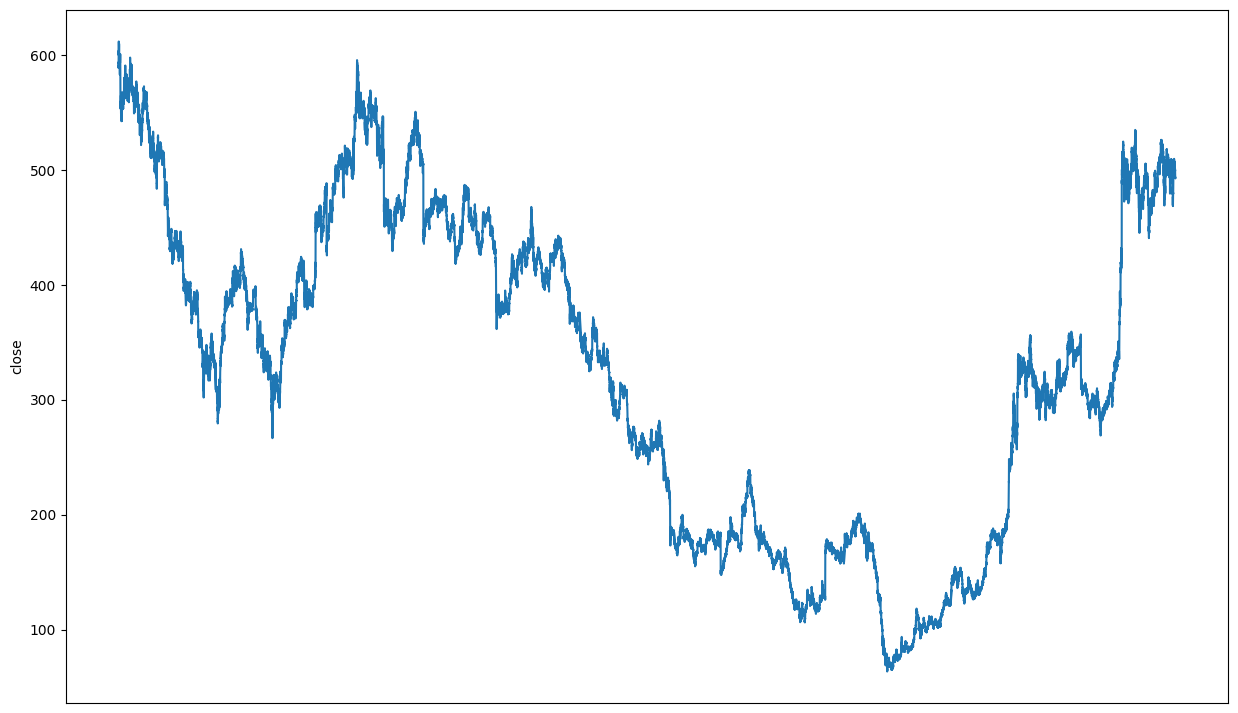

In [4]:
df_Tata = df_Tata[df_Tata.date > '2015-02-02 14:30:00+05:30']
plt.figure(figsize=(15,9))
plt.xticks([]) # quito los datos del eje x, porque no caben y esta ilegible.
sns.lineplot(data=df_Tata, x="date", y="close")

In [ ]:
# df_Tata['date'] = pd.to_datetime(df_Tata['date'])
# df_Tata.index = pd.to_datetime(df_Tata.index)
# new_index = pd.date_range(start=df_Tata.index.min(), end=df_Tata.index.max(), freq='5min')

In [12]:
df_Tata

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
1,2015-02-02 14:35:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,...,16.204258,12.051888,4.017296,48.694251,-57.541899,1.957628,1.90,589.866667,32.404181,1.028755
2,2015-02-02 14:40:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,...,18.151815,0.000000,4.017296,46.708143,-75.151515,1.967798,2.10,590.150000,31.377250,0.924290
3,2015-02-02 14:45:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,...,21.485149,0.000000,4.017296,42.824629,-92.465753,1.937955,1.55,589.083333,30.566204,0.803627
4,2015-02-02 14:50:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,...,34.064667,100.000000,33.333333,49.822307,-64.137931,2.035244,3.30,590.366667,29.669480,0.529479
5,2015-02-02 14:55:00+05:30,591.00,594.95,590.75,592.90,113510,590.55,591.240,592.326667,591.2225,...,51.354870,100.000000,66.666667,46.625229,-37.931034,2.189869,4.20,592.866667,28.590614,0.685250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130342,2022-02-18 15:05:00+05:30,493.15,493.40,492.80,493.00,221628,493.18,493.915,495.140000,496.0050,...,45.745614,57.126719,72.499418,41.729108,-79.729730,1.209109,0.60,493.066667,35.438324,0.533217
130343,2022-02-18 15:10:00+05:30,493.00,493.35,492.50,493.15,292571,493.11,493.735,494.770000,495.7150,...,42.412281,100.000000,85.708906,43.464499,-77.551020,1.183458,0.85,493.000000,34.058754,0.134967
130344,2022-02-18 15:15:00+05:30,493.20,493.75,493.00,493.15,377970,493.14,493.550,494.436667,495.4725,...,38.333333,100.000000,85.708906,47.389327,-76.760563,1.152497,0.75,493.300000,32.785115,0.248388
130345,2022-02-18 15:20:00+05:30,493.25,493.30,492.35,492.90,532972,493.08,493.335,494.056667,495.1825,...,30.193798,26.453889,75.484630,41.272606,-76.666667,1.138033,0.95,492.850000,31.761366,0.332462


In [18]:
df_Tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 03:00:00+05:30', periods=len(df_Tata),  freq='min')) #sobreescribo mi columna date con nuevo range por minutos 
df_Tata = df_Tata.set_index('date') # pongo la columna fecha como indice. para facilitar el analisis.
df_Tata.head()

,open,high,low,close,volume,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
date,,,,,,,,,,,,,,,,,,,,,
2021-11-20 03:00:00+05:30,591.30,591.85,590.05,590.05,46808,591.93,593.215,591.446667,589.5925,591.680691,...,18.518076,0.000000,7.618849,43.940031,-51.141553,1.962061,1.80,590.650000,33.740113,1.177608
2021-11-20 03:01:00+05:30,589.80,590.50,588.60,590.50,77183,591.37,592.785,591.813333,589.9750,591.287127,...,16.204258,12.051888,4.017296,48.694251,-57.541899,1.957628,1.90,589.866667,32.404181,1.028755
2021-11-20 03:02:00+05:30,590.25,591.55,589.45,589.45,62950,590.93,592.330,592.000000,590.2750,590.674751,...,18.151815,0.000000,4.017296,46.708143,-75.151515,1.967798,2.10,590.150000,31.377250,0.924290
2021-11-20 03:03:00+05:30,589.30,589.95,588.40,588.90,78077,590.09,591.765,592.093333,590.4875,590.083168,...,21.485149,0.000000,4.017296,42.824629,-92.465753,1.937955,1.55,589.083333,30.566204,0.803627
2021-11-20 03:04:00+05:30,588.90,591.70,588.40,591.00,66550,589.98,591.355,592.140000,590.8175,590.388778,...,34.064667,100.000000,33.333333,49.822307,-64.137931,2.035244,3.30,590.366667,29.669480,0.529479


In [19]:
df_train_tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 02:59:00+05:30', periods=len(df_train_tata),  freq='min')) #sobreescribo mi columna date con nuevo range por minutos 
df_train_tata = df_train_tata.set_index('date') # pongo la columna fecha como indice. para facilitar el analisis.

df_train_tata['year'] = df_train_tata.index.year
df_train_tata['month'] = df_train_tata.index.month
df_train_tata['day'] = df_train_tata.index.day
df_train_tata['weekday'] = df_train_tata.index.day_name()
df_train_tata['weekofyear'] = df_train_tata.index.isocalendar().week
df_train_tata['hour'] = df_train_tata.index.hour
df_train_tata['minute'] = df_train_tata.index.minute

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_train_tata['weekday'] = df_train_tata['weekday'].map(weekday_mapping)

In [ ]:
df_test_tata['date'] = pd.DatetimeIndex(pd.date_range('2021-11-20 02:59:00+05:30', periods=len(df_test_tata),  freq='min'))
df_test_tata = df_test_tata.set_index('date')

df_test_tata['year'] = df_test_tata.index.year
df_test_tata['month'] = df_test_tata.index.month
df_test_tata['day'] = df_test_tata.index.day
df_test_tata['weekday'] = df_test_tata.index.day_name()
df_test_tata['weekofyear'] = df_test_tata.index.isocalendar().week
df_test_tata['hour'] = df_test_tata.index.hour
df_test_tata['minute'] = df_test_tata.index.minute

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_test_tata['weekday'] = df_test_tata['weekday'].map(weekday_mapping)

In [ ]:
def ema_5_20_crossover(data): # Expecting a dataframe, where close price, ema5 and ema20 value present
    buy_signal, sell_signal = [], []
    buy_price, sell_price = [], []
    flag = -1
    for i in range(len(data)):
        if data['ema5'][i] > data['ema20'][i]:
            if flag != 1:  # fresh buy signal
                buy_signal.append(1)
                buy_price.append(data['close'][i])
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
                flag = 1
            else:  # if buy signal is already executed, then append everything as nan
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
        elif data['ema5'][i] < data['ema20'][i]:
            if flag != 0:  # sell signal
                sell_signal.append(0)
                sell_price.append(data['close'][i])
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                flag = 0
            else:   # if sell signal is already executed, then append everything as nan
                buy_signal.append(np.nan)
                buy_price.append(np.nan)
                sell_signal.append(np.nan)
                sell_price.append(np.nan)
        else:
            buy_signal.append(np.nan)
            buy_price.append(np.nan)
            sell_signal.append(np.nan)
            sell_price.append(np.nan)
    return buy_signal, buy_price, sell_signal, sell_price

In [ ]:
# Generar las señales de compra y venta
buy_signal, buy_price, sell_signal, sell_price = ema_5_20_crossover(df_train_tata)

# Añadir las señales al DataFrame
df_train_tata['buy_signal'] = buy_signal
df_train_tata['buy_price'] = buy_price
df_train_tata['sell_signal'] = sell_signal
df_train_tata['sell_price'] = sell_price
df_train_tata['buy_signal'] = df_train_tata['buy_signal'].fillna(0)

In [ ]:
# Generar señales de compra y venta
buy_signal, buy_price, sell_signal, sell_price = ema_5_20_crossover(df_test_tata)

# Añadir las señales al DataFrame
df_test_tata['buy_signal'] = buy_signal
df_test_tata['buy_price'] = buy_price
df_test_tata['sell_signal'] = sell_signal
df_test_tata['sell_price'] = sell_price
df_test_tata['buy_signal'] = df_test_tata['buy_signal'].fillna(0)

In [ ]:
from imblearn.over_sampling import SMOTE

X = df_train_tata[['ema5', 'ema20',"volume","CCI15","CCI10"]]
y = df_train_tata['buy_signal']

X = X.astype(int)
y = y.astype(int)
# Crear un objeto SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_res_tata, y_res_tata = smote.fit_resample(X, y)